### ASSIGNMENT 3
#### Aryan Sethi (21BCE0704)

In [239]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

##### 1. penguins_size.csv is downloaded.
##### 2. Load the dataset

In [240]:
# Load the dataset
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [241]:
df.shape

(344, 7)

##### 3. Perform Visualizations

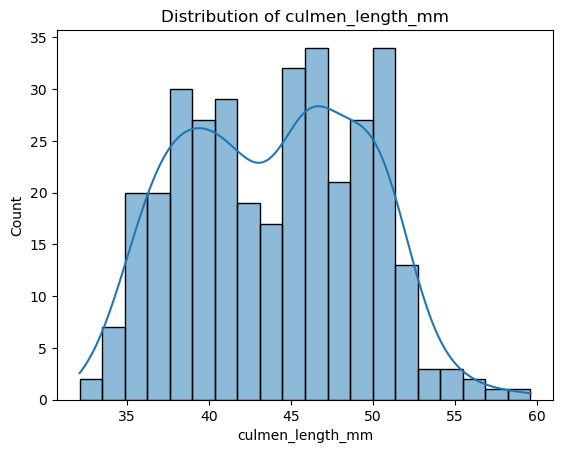

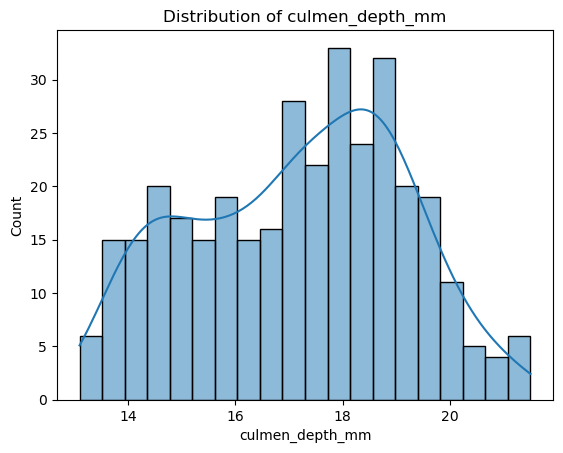

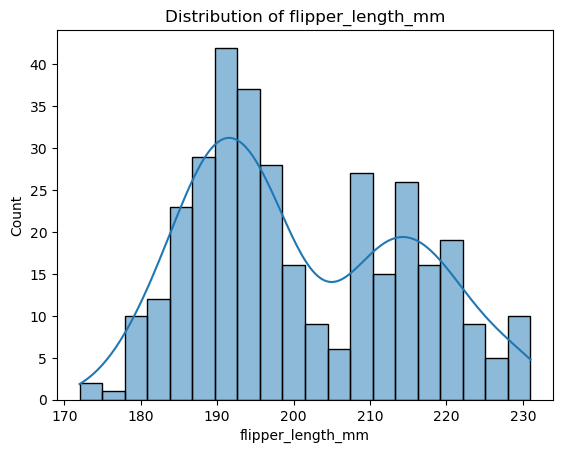

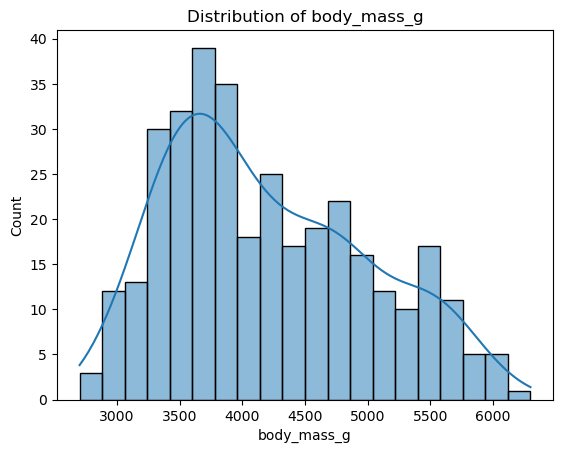

In [242]:
# Univariate Analysis
# Create histograms for numerical features
numerical_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in numerical_cols:
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [243]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

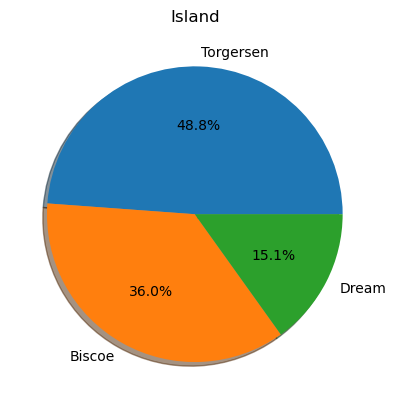

In [244]:
plt.pie(df['island'].value_counts(),labels = ['Torgersen', 'Biscoe', 'Dream'],autopct ='%1.1f%%',shadow = True)
plt.title('Island')
plt.show()

##### Bi-Variate Analysis

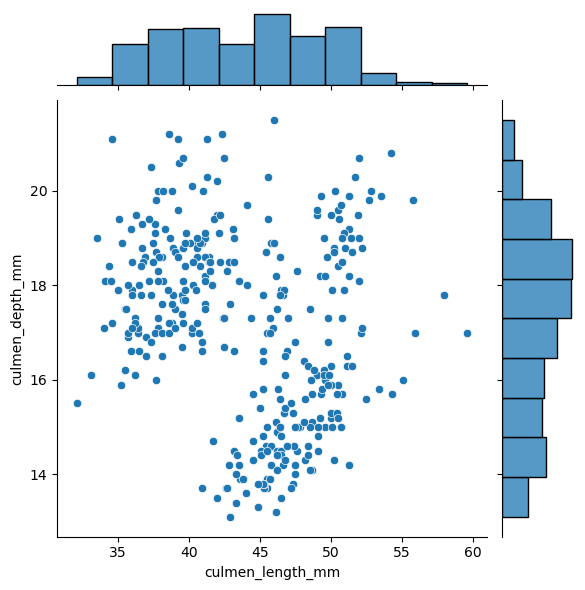

In [245]:
sns.jointplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', kind='scatter')
plt.show()

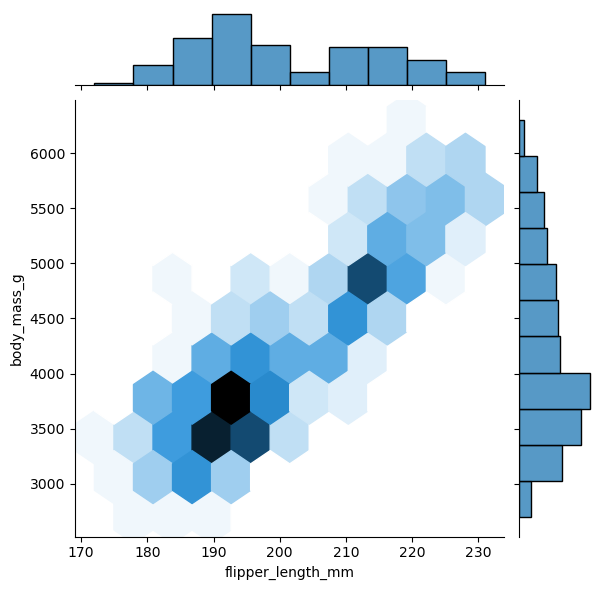

In [246]:
sns.jointplot(data=df, x='flipper_length_mm', y='body_mass_g', kind='hex')
plt.show()

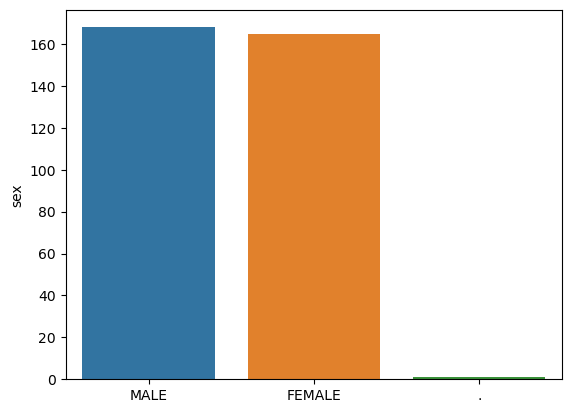

In [247]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts() )
plt.show()

##### Multi-Variate Analysis

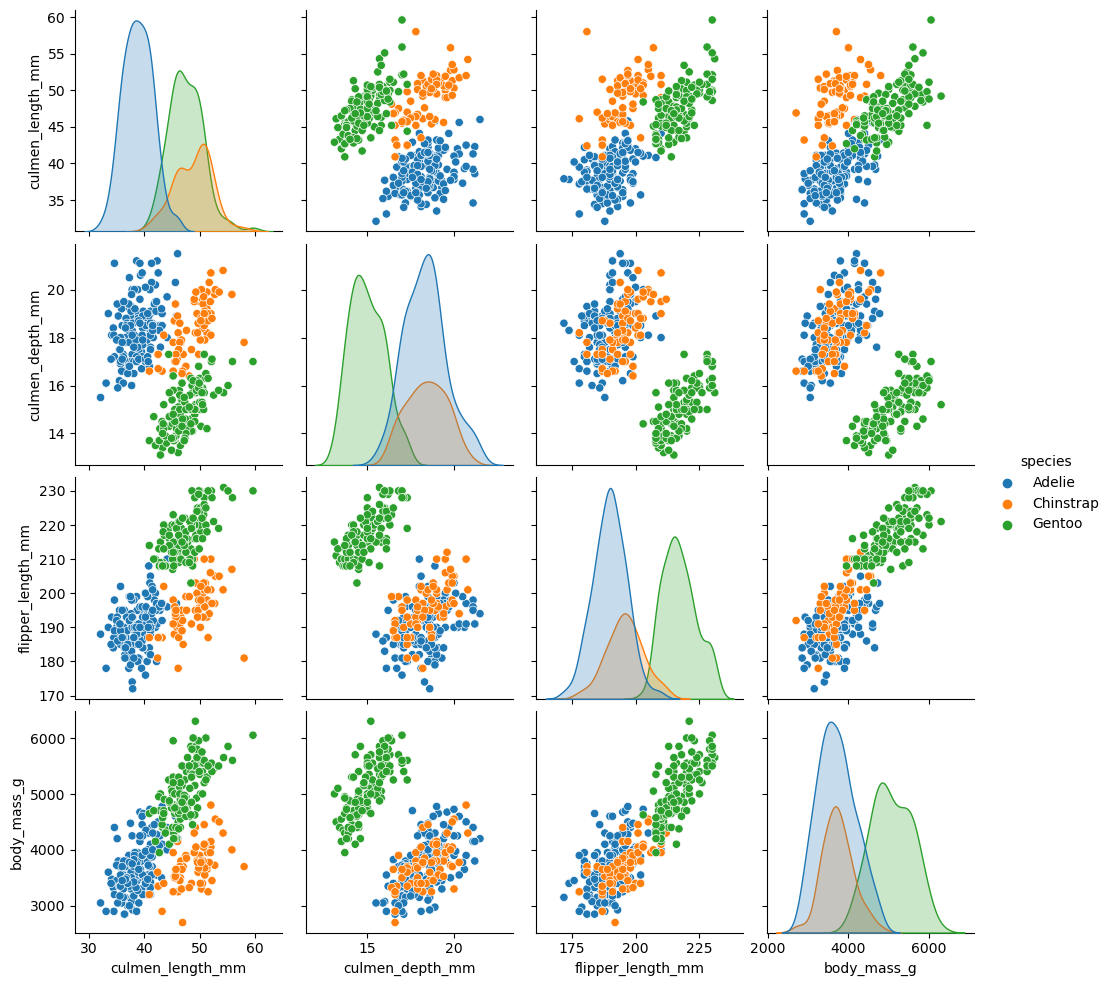

In [248]:
sns.pairplot(data=df, hue='species')
plt.show()

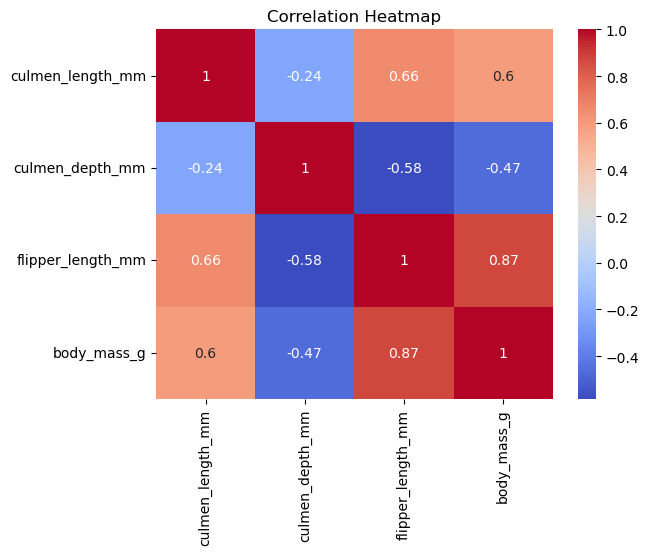

In [249]:
# Create a heatmap to visualize correlations between features
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 4. Perform descriptive statistics

In [250]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### 5. Check for Missing values and deal with them

In [251]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [252]:
# Code to replace null values in numerical columns with MEDIAN
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

# Code to replace null values in categorical column with MODE
df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

In [253]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

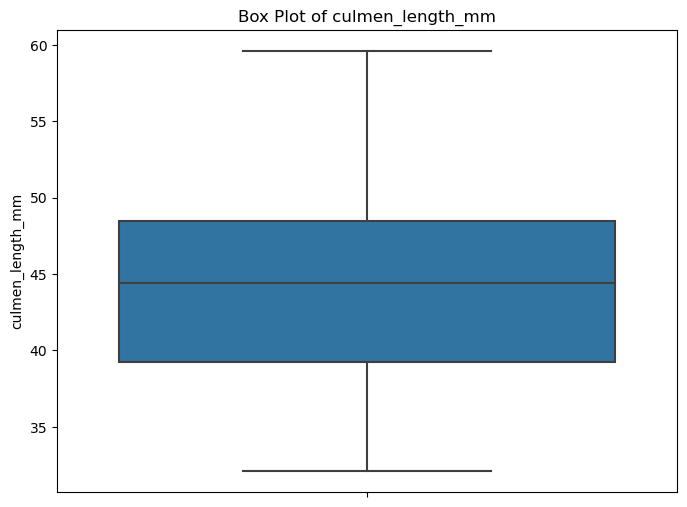

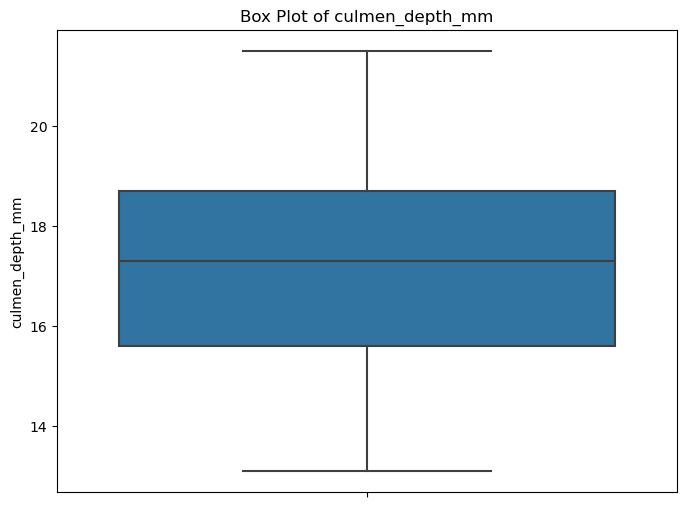

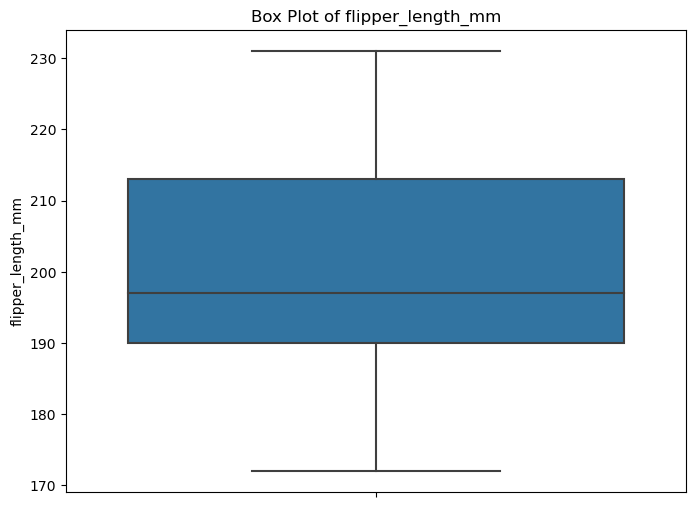

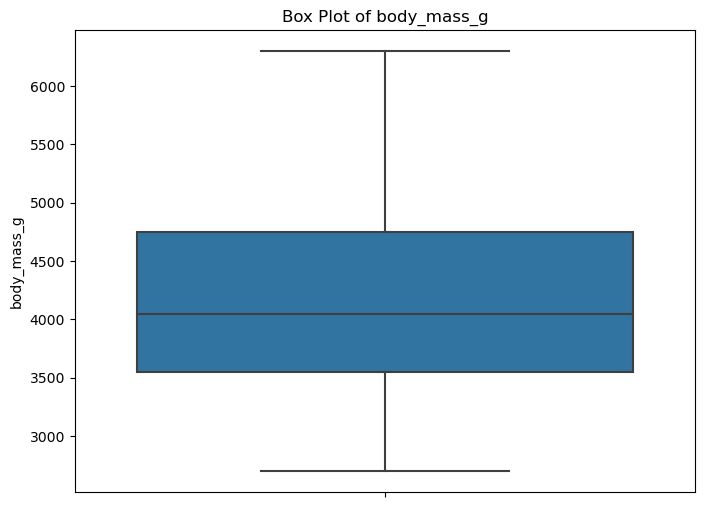

In [254]:
numerical_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [255]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


##### 8. Check for Categorical columns and perform encoding

In [256]:
df.sex = LabelEncoder().fit_transform(df.sex)
df.species = LabelEncoder().fit_transform(df.species)

In [257]:
df_main = pd.get_dummies(df,columns =['island'])
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,2,0,0,1
1,0,39.50,17.4,186.0,3800.0,1,0,0,1
2,0,40.30,18.0,195.0,3250.0,1,0,0,1
3,0,44.45,17.3,197.0,4050.0,2,0,0,1
4,0,36.70,19.3,193.0,3450.0,1,0,0,1


##### 6. There are no outliers 

##### 7. Check the correlation of independent variables with the target

In [258]:
correlation_matrix = df_main.corr()
correlation_with_target = correlation_matrix['species'].sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
island_Biscoe        0.610710
sex                 -0.003823
island_Dream        -0.311589
island_Torgersen    -0.434574
culmen_depth_mm     -0.741282
Name: species, dtype: float64


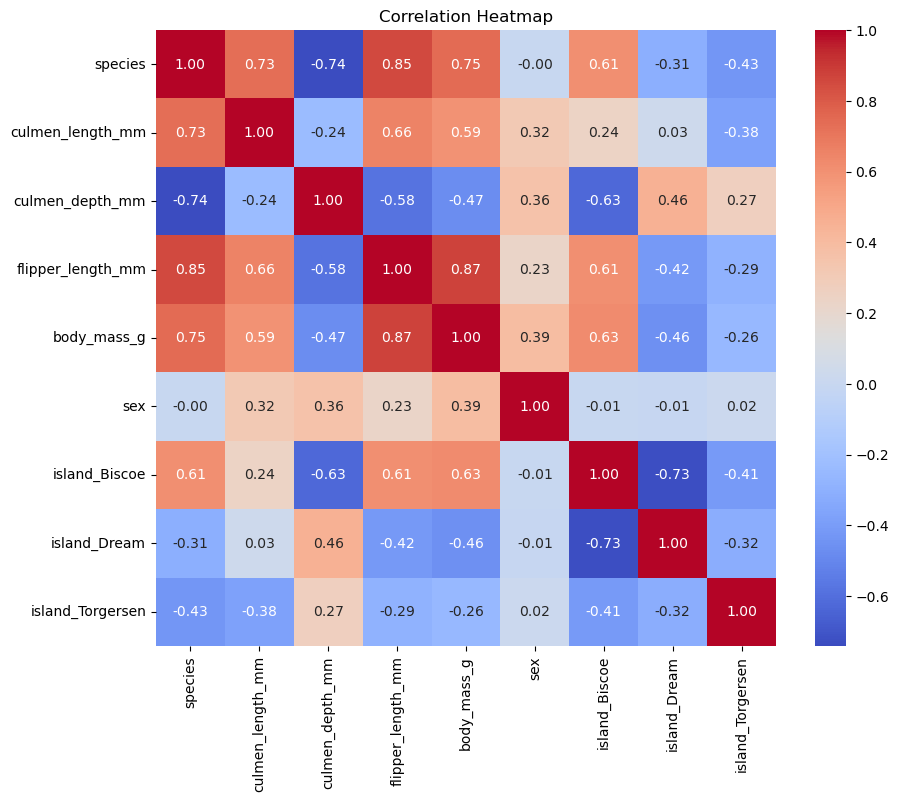

In [259]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 8. Encoding done above

##### 9. Split the data into dependent and independent variables

In [260]:
X = df_main.drop('species', axis=1)
y = df_main['species']

##### 10. Scaling the data

In [261]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### 11. Split the data into training and testing

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### 12. Check the training and testing data shape

In [263]:
print("Training data shape for X_train:", X_train.shape)
print("Training data shape for y_train:", y_train.shape)
print("Testing data shape for X_test:", X_test.shape)
print("Testing data shape for y_test:", y_test.shape)

Training data shape for X_train: (275, 8)
Training data shape for y_train: (275,)
Testing data shape for X_test: (69, 8)
Testing data shape for y_test: (69,)
